### This Notebook is part of project responcible for predicting terrorist group responcible for the event by using  features in Global Terrorism Dataset(GTD). This Notebook is devided into two sections:
### 1) Data Exploration and 2) Preprocessing 

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
#from sklearn import preprocessing
from sklearn.preprocessing import scale

#from sklearn import decomposition
#from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1) Data Exploration

In [2]:
#read data from main file downloaded from http://www.start.umd.edu/gtd/
#gtdRaw = pd.read_csv("C:/Users/Prashant/Downloads/GTD/DownloadedCode/EDA_Plotly/globalterrorismdb_0617dist.csv", encoding='ISO-8859-1', low_memory=False)
gtdRaw = pd.read_csv("globalterrorismdb_0617dist.csv", encoding='ISO-8859-1', low_memory=False)

In [3]:
gtd=gtdRaw
print ('The dataset documents', gtdRaw.shape[0], 'terror attacks with', gtdRaw.shape[1], 'different features')

The dataset documents 170350 terror attacks with 135 different features


In [4]:
print(gtd.info())
pd.DataFrame(gtd).head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 175.5+ MB
None


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
gtd.describe() 

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.703500e+05,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,165744.000000,165744.000000,170346.000000,...,1.279000e+03,4.960000e+02,7.070000e+02,487.000000,9911.000000,9322.000000,170350.000000,170350.000000,170350.000000,170350.000000
mean,2.001776e+11,2001.709997,6.474365,15.466845,0.043634,132.526669,7.091441,23.399774,26.350909,1.454428,...,3.224502e+06,4.519918e+05,3.849663e+05,272.462012,4.624458,-28.717335,-4.583387,-4.510555,0.091083,-3.975128
std,1.314444e+09,13.144146,3.392364,8.817929,0.204279,112.848161,2.949206,18.844885,58.570068,1.009005,...,3.090625e+07,6.070186e+06,2.435027e+06,3130.068208,2.041008,58.737198,4.542694,4.630440,0.583166,4.691492
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.990053e+11,1990.000000,4.000000,8.000000,0.000000,75.000000,5.000000,11.263580,2.396199,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.007121e+11,2007.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.472680,43.130000,1.000000,...,1.420000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014023e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.744167,68.451297,1.000000,...,4.000000e+05,0.000000e+00,7.356800e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017013e+11,2016.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,1.000000e+09,1.320000e+08,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000


Looking for feature having less then 1000 missing value

In [6]:
print ('missing data : \n')
print (gtd.isnull().sum().sort_values(ascending = True).head(50))

missing data : 

eventid                 0
crit3                   0
doubtterr               0
multiple                0
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
crit2                   0
INT_LOG                 0
individual              0
targtype1_txt           0
property                0
gname                   0
weaptype1_txt           0
weaptype1               0
INT_ANY                 0
dbsource                0
crit1                   0
targtype1               0
extended                0
vicinity                0
iyear                   0
INT_MISC                0
INT_IDEO                0
country                 0
iday                    0
imonth                  0
region_txt              0
region                  0
country_txt             0
specificity             4
ishostkid             178
guncertain1           379
city                  446
target1               634
natlty1              1394
natlty1_txt          


    
#### Spatio-Temporal Variables:
            'iyear', 'imonth', 'iday', 'latitude', 'longitude',

#### Binary Variables: 
            'extended', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr',
            'multiple', 'success', 'suicide', 'guncertain1', ## check back guncertain
            'claimed', 'property', 'ishostkid',

#### Continuous Variables:
            'nkill', 'nwound',               

#### Categorical variables (textual): 
            'country_txt', 'region_txt', 'alternative_txt', 'attacktype1_txt', 'targtype1_txt',
            'natlty1_txt', 'weaptype1_txt', 

#### Descriptive Variables: 
            'target1', 'gname', 'summary',    

                                            ]



### Number of Terrorist Activities each Year

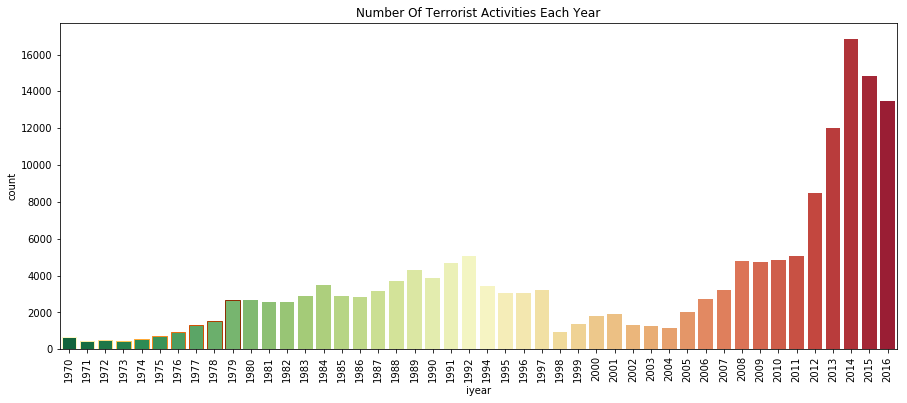

In [8]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=gtd,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

### Top Countries affected by Terror Attacks

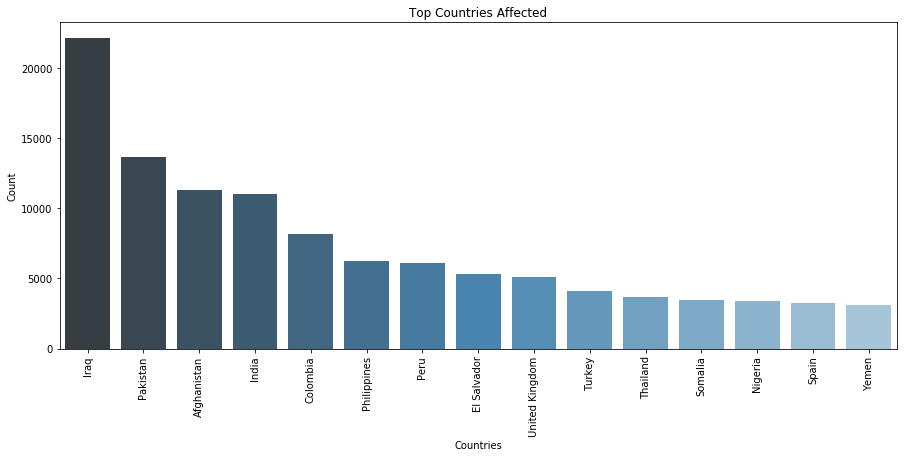

In [9]:
plt.subplots(figsize=(15,6))
sns.barplot(gtd['country_txt'].value_counts()[:15].index,gtd['country_txt'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

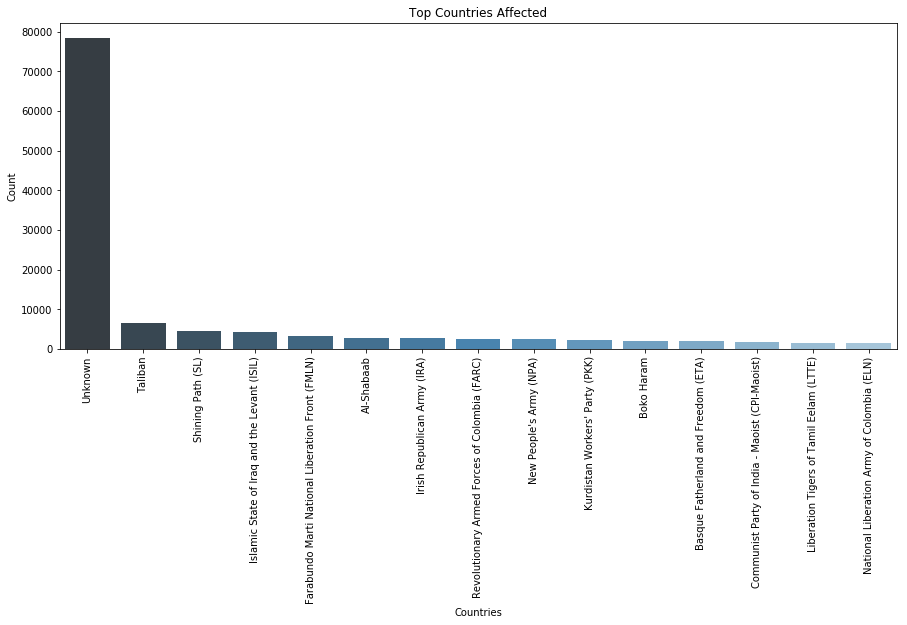

In [10]:
plt.subplots(figsize=(15,6))
sns.barplot(gtd['gname'].value_counts()[:15].index,gtd['gname'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [11]:
print("Country with the most attacks:",gtd['country_txt'].value_counts().idxmax())
print("City with the most attacks:",gtd['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",gtd['region_txt'].value_counts().idxmax())
print("Year with the most attacks:",gtd['iyear'].value_counts().idxmax())
print("Month with the most attacks:",gtd['imonth'].value_counts().idxmax())
print("Group with the most attacks:",gtd['gname'].value_counts().index[1])
print("Most Attack Types:",gtd['attacktype1_txt'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


Assigned gname column as target variable

In [12]:
target=gtd["gname"]
groupCounts = Counter(target)
mostCommon=groupCounts.most_common(1)[0]
print("Total number of Groups= {}".format(len(groupCounts)))
print("Most Common group = {}, with {:.4f}%".format(mostCommon[0], mostCommon[1]/target.size))
groupCounts.most_common(5)

Total number of Groups= 3454
Most Common group = Unknown, with 0.4597%


[('Unknown', 78306),
 ('Taliban', 6575),
 ('Shining Path (SL)', 4551),
 ('Islamic State of Iraq and the Levant (ISIL)', 4287),
 ('Farabundo Marti National Liberation Front (FMLN)', 3351)]

## Preprocessing


Converting Descriptive columns target1 and gname as lower case and replacing long value by small dummy one.

In [13]:
gtd.gname = gtd.gname.str.lower()
gtd.target1 = gtd.target1.str.lower()
gtd.weaptype1_txt.replace(
    'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
    'Vehicle', inplace = True)

Filtering group having more then 3 entries and selecting columns as feature for further analysis.Most of them as numeric or binary columns. Removing 'unknown' terrorist group row as this value is very lage and have no group name.

In [15]:
filtered_group = [name for name,total  in groupCounts.items() if total >3 ]
filtered_group.remove("Unknown")
gtd=gtd[gtd["gname"].isin(filtered_group)]
print(gtd.shape)

columns_to_keep = ['gname', 'iyear', 'country', 'crit1', 'crit2', 'crit3', 'attacktype1', 'targtype1',
                       'targsubtype1','weaptype1', 'weapsubtype1', 'ransom', 'nkill', 'nwound', 'guncertain1', 'ishostkid']
gtd=gtd[columns_to_keep]
gtd.tail(3)

(5, 135)


,gname,iyear,country,crit1,crit2,crit3,attacktype1,targtype1,targsubtype1,weaptype1,weapsubtype1,ransom,nkill,nwound,guncertain1,ishostkid
64959,rioters,1997,93,1,1,1,7,1,7.0,8,NaN,0.0,0.0,0.0,0.0,0.0
66181,rioters,1997,94,1,1,1,7,2,21.0,8,NaN,0.0,2.0,51.0,0.0,0.0
66182,rioters,1997,94,1,1,1,7,2,21.0,8,NaN,0.0,2.0,51.0,0.0,0.0


Now we left with 88657 rows and 135 columns. Lets fill the NA values with column median or zero values

In [17]:
#a=gtd.apply(preprocessing.LabelEncoder().fit_transform)
#print(a.tail(3))
gtd.nkill = np.round(gtd.nkill.fillna(gtd.nkill.median())).astype(int) 
gtd.nwound = np.round(gtd.nwound.fillna(gtd.nwound.median())).astype(int) 
gtd.weapsubtype1.fillna(0, inplace = True)
gtd.targsubtype1 = np.round(gtd.targsubtype1.fillna(gtd.targsubtype1.median())).astype(int) 
# Very few data missing as we saw above
gtd.guncertain1.fillna(0, inplace = True)
gtd.ishostkid.fillna(0, inplace = True)
gtd.ransom.fillna(0, inplace = True)
#gtd=gtd.fillna(0)
gtd.tail(10)


,gname,iyear,country,crit1,crit2,crit3,attacktype1,targtype1,targsubtype1,weaptype1,weapsubtype1,ransom,nkill,nwound,guncertain1,ishostkid
51422,rioters,1992,147,1,1,1,7,14,75,8,0.0,0.0,0,0,0.0,0.0
54372,rioters,1992,228,1,1,1,9,1,7,13,0.0,0.0,4,12,0.0,0.0
64959,rioters,1997,93,1,1,1,7,1,7,8,0.0,0.0,0,0,0.0,0.0
66181,rioters,1997,94,1,1,1,7,2,21,8,0.0,0.0,2,51,0.0,0.0
66182,rioters,1997,94,1,1,1,7,2,21,8,0.0,0.0,2,51,0.0,0.0


Checking if any missing value left

In [18]:
gtd.isnull().sum().sort_values()

gname           0
iyear           0
country         0
crit1           0
crit2           0
crit3           0
attacktype1     0
targtype1       0
targsubtype1    0
weaptype1       0
weapsubtype1    0
ransom          0
nkill           0
nwound          0
guncertain1     0
ishostkid       0
dtype: int64

Creating two new features: total number of casualties and its binary interpretation

In [19]:
gtd['casualties'] = gtd.nkill + gtd.nwound
gtd['nclass'] = gtd.casualties.apply(lambda x: 0 if x == 0 else 1) 

Saving the process file for further analysis done in the next Fitting_Pridict file.

In [20]:
#csvFileName = 'C:/Users/Prashant/Downloads/GTD/DownloadedCode/GlobalTerrorismAttacks-master/gtd_processed_features.csv'
csvFileName = 'gtd_processed_features.csv'
gtd.to_csv(csvFileName, encoding='utf-8', index=False)